## Air Quality Feature Engineering Report

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
%matplotlib inline

### Reading air_quality_health_dataset

In [2]:
df = pd.read_csv("air_quality_health_dataset.csv")
df.head()

,date,region,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,humidity,wind_speed,precipitation,hospital_visits,emergency_visits,mobility_index,school_closures,public_transport_usage,mask_usage_rate,lockdown_status,industrial_activity,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage
0,2020-01-01,East,109.934283,31.382887,57.718373,47.654022,25.874070,0.956973,32.574682,37.555663,20.542799,5.204995,0.179832,18,6,77.270683,0,43.103376,75.706162,0,66.098466,9757,63.001573,11,1957.637287,42.348419
1,2020-01-02,Central,97.234714,47.094225,67.381383,50.734127,10.605095,0.990203,23.749138,24.900342,27.308785,6.235446,3.278768,20,8,91.531470,0,30.606591,69.652802,0,107.686174,9157,6.417798,13,2962.769470,27.712735
2,2020-01-03,East,112.953771,53.795917,61.158796,44.986899,18.361025,1.019288,35.530851,23.437165,80.055977,5.673999,1.502239,18,8,83.654836,0,13.037424,82.561183,1,77.445192,2058,66.001849,3,6912.007043,41.031516
3,2020-01-04,West,130.460597,88.315315,69.040084,20.575023,19.791700,1.284058,25.277106,22.388200,25.929988,8.496463,9.061902,18,4,59.752950,0,8.974779,73.642836,0,51.864000,8726,79.580923,6,9227.543628,40.543537
4,2020-01-05,South,95.316933,68.348297,75.716994,38.445776,20.079543,0.775835,35.996440,26.881835,34.946343,1.184104,1.758327,21,5,77.392469,1,96.022689,68.688106,0,148.714488,9720,6.301105,8,1277.810175,5.648920


### Load Dataset
We load the air quality and health dataset and preview the first few rows.

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    3000 non-null   object 
 1   region                  3000 non-null   object 
 2   AQI                     3000 non-null   float64
 3   PM2.5                   3000 non-null   float64
 4   PM10                    3000 non-null   float64
 5   NO2                     3000 non-null   float64
 6   SO2                     3000 non-null   float64
 7   CO                      3000 non-null   float64
 8   O3                      3000 non-null   float64
 9   temperature             3000 non-null   float64
 10  humidity                3000 non-null   float64
 11  wind_speed              3000 non-null   float64
 12  precipitation           3000 non-null   float64
 13  hospital_visits         3000 non-null   int64  
 14  emergency_visits        3000 non-null   

date                      0
region                    0
AQI                       0
PM2.5                     0
PM10                      0
NO2                       0
SO2                       0
CO                        0
O3                        0
temperature               0
humidity                  0
wind_speed                0
precipitation             0
hospital_visits           0
emergency_visits          0
mobility_index            0
school_closures           0
public_transport_usage    0
mask_usage_rate           0
lockdown_status           0
industrial_activity       0
vehicle_count             0
construction_activity     0
respiratory_admissions    0
population_density        0
green_cover_percentage    0
dtype: int64

### Dataset Overview & Null Values
We check data types and identify any missing values.

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()

### Date Conversion and Feature Extraction
We convert `date` to datetime and extract `month`, `day`, and `weekday`.

In [5]:
def categorize_aqi(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Moderate'
    elif aqi <= 150: return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200: return 'Unhealthy'
    elif aqi <= 300: return 'Very Unhealthy'
    else: return 'Hazardous'

df['AQI_Category'] = df['AQI'].apply(categorize_aqi)

### Categorizing AQI
We assign each AQI value into a category to simplify analysis.

C:\Users\HP\AppData\Local\Temp\ipykernel_13780\1956639926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='region', y='AQI', palette='viridis')


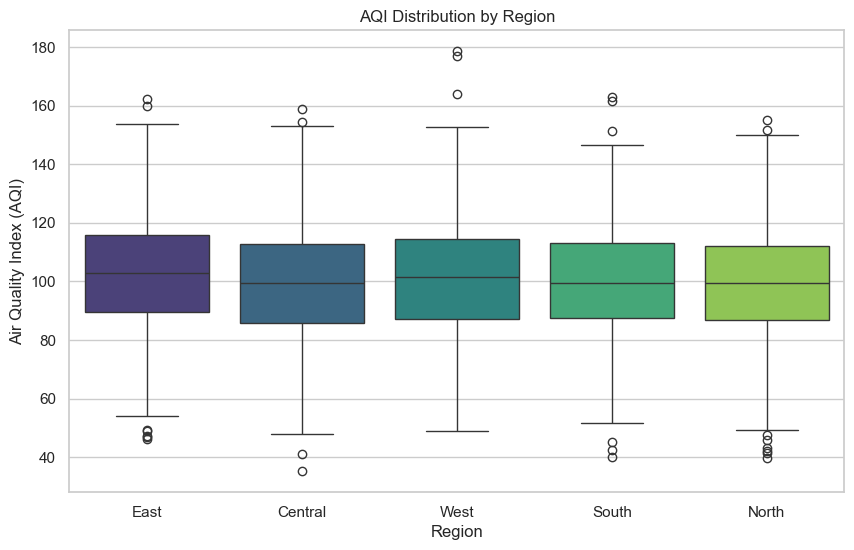

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='region', y='AQI', palette='viridis')
plt.title("AQI Distribution by Region")
plt.ylabel("Air Quality Index (AQI)")
plt.xlabel("Region")
plt.show()

###  AQI Distribution by Region
Boxplot shows AQI spread and outliers by region.

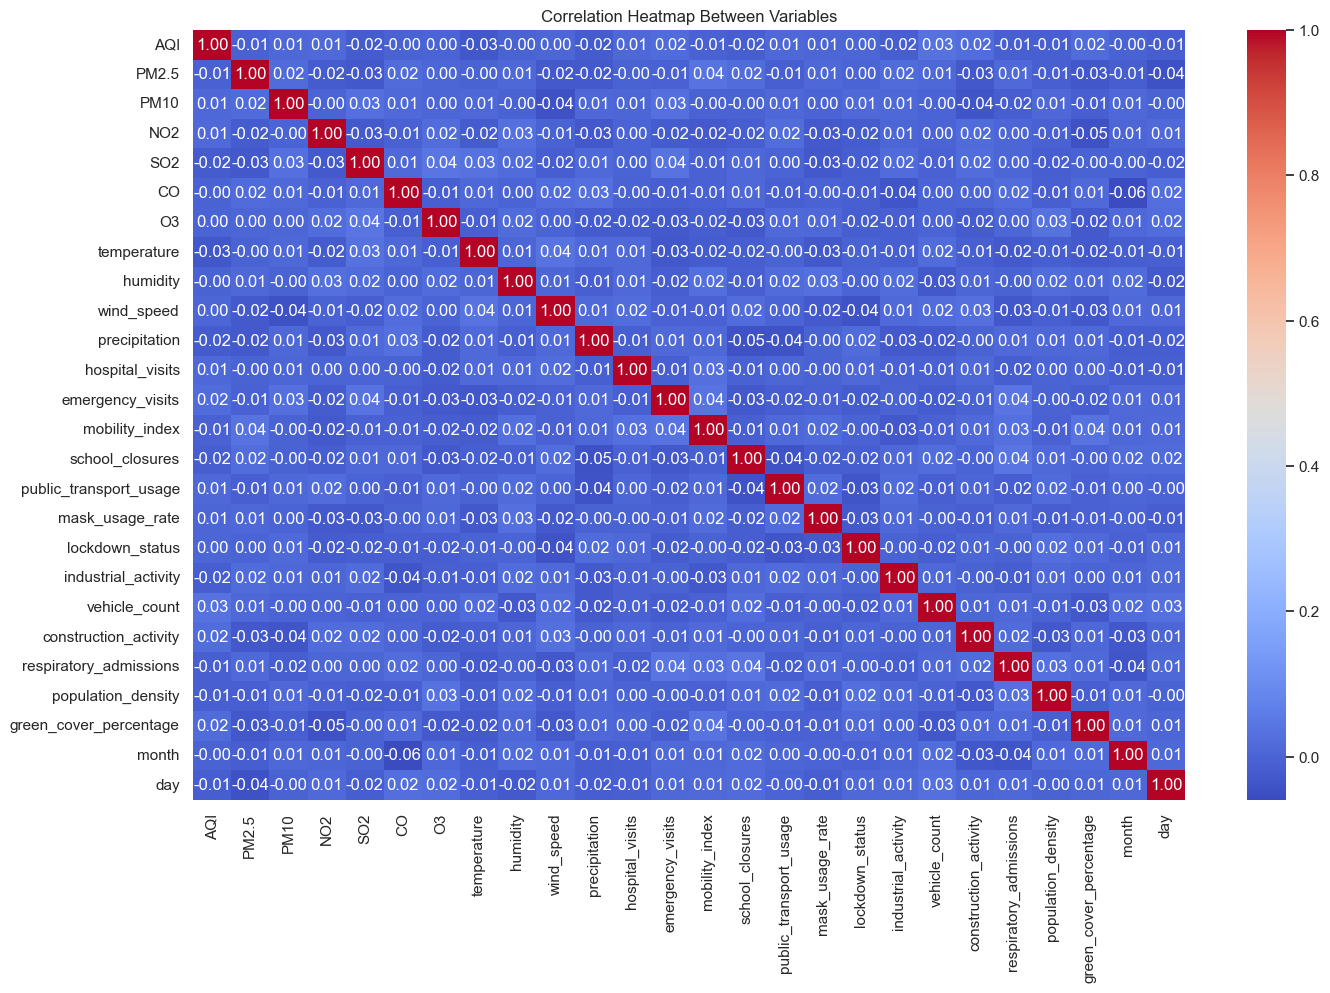

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap Between Variables")
plt.show()

### Correlation Heatmap
We examine linear relationships between variables.

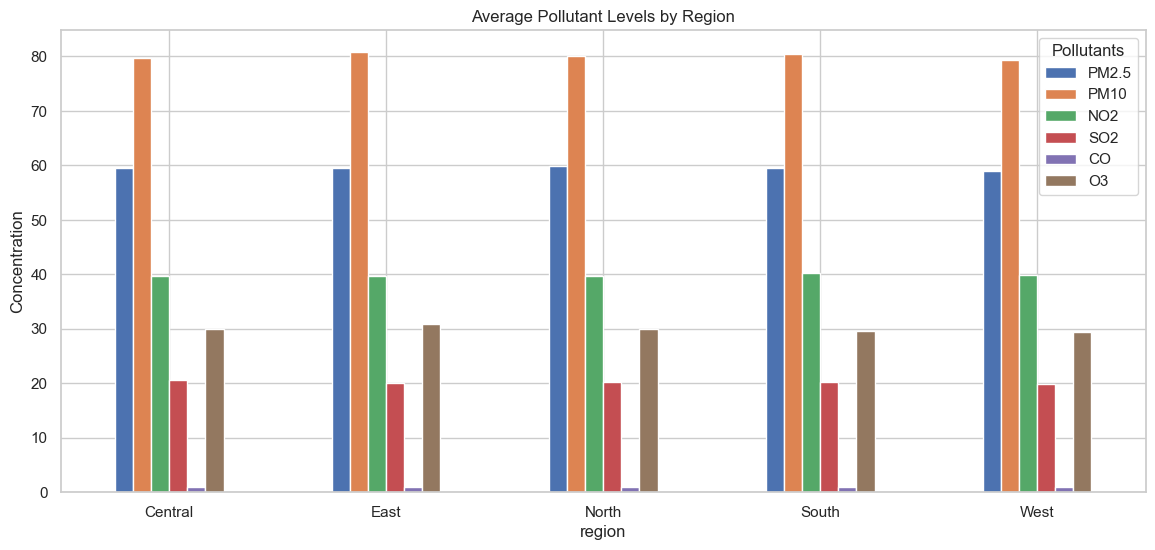

In [11]:
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
df.groupby('region')[pollutants].mean().plot(kind='bar', figsize=(14, 6))
plt.title("Average Pollutant Levels by Region")
plt.ylabel("Concentration")
plt.xticks(rotation=0)
plt.legend(title="Pollutants")
plt.show()

###  Average Pollutants by Region
Grouped bar chart comparing pollutant levels across regions.

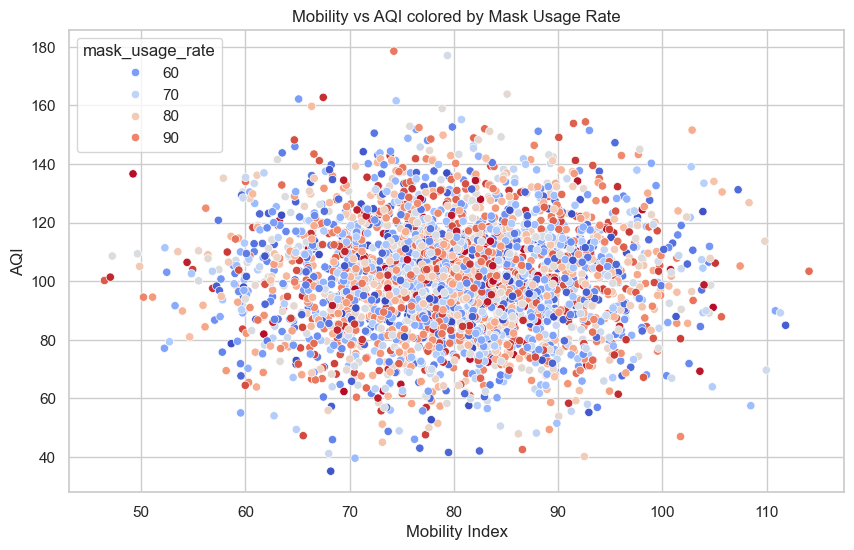

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='mobility_index', y='AQI', hue='mask_usage_rate', palette='coolwarm')
plt.title("Mobility vs AQI colored by Mask Usage Rate")
plt.xlabel("Mobility Index")
plt.ylabel("AQI")
plt.show()

### Impact of Mobility on AQI
We check if higher movement correlates with poor air quality.

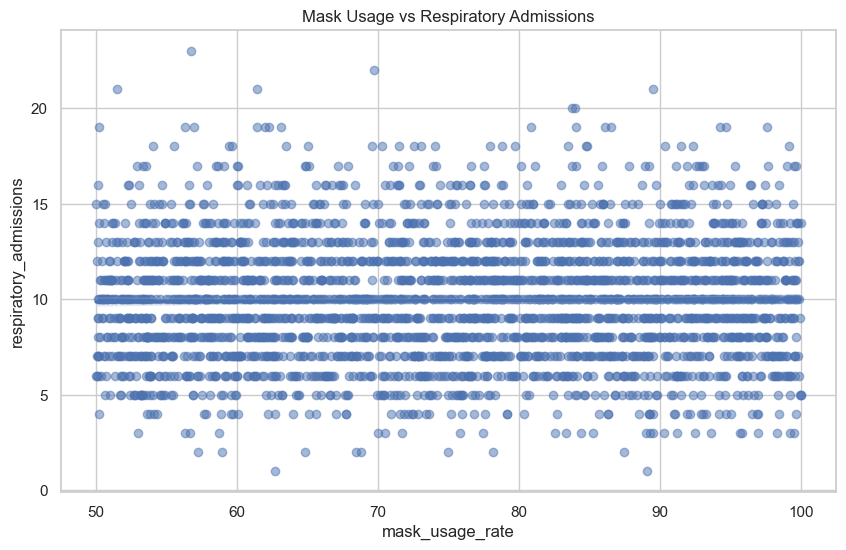

In [13]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='mask_usage_rate', y='respiratory_admissions', scatter_kws={'alpha':0.5})
plt.title("Mask Usage vs Respiratory Admissions")
plt.show()

###  Mask Usage Effect on Health
We analyze how mask usage correlates with fewer respiratory cases.

In [14]:
df['is_lockdown'] = df['lockdown_status'].astype(bool)

###  Binary Lockdown Feature
We create a new column indicating lockdown status as True/False.

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Health_Risk_Index'] = scaler.fit_transform(df[pollutants]).mean(axis=1)

###  Health Risk Index
We compute a normalized index from pollution data to estimate health risk.

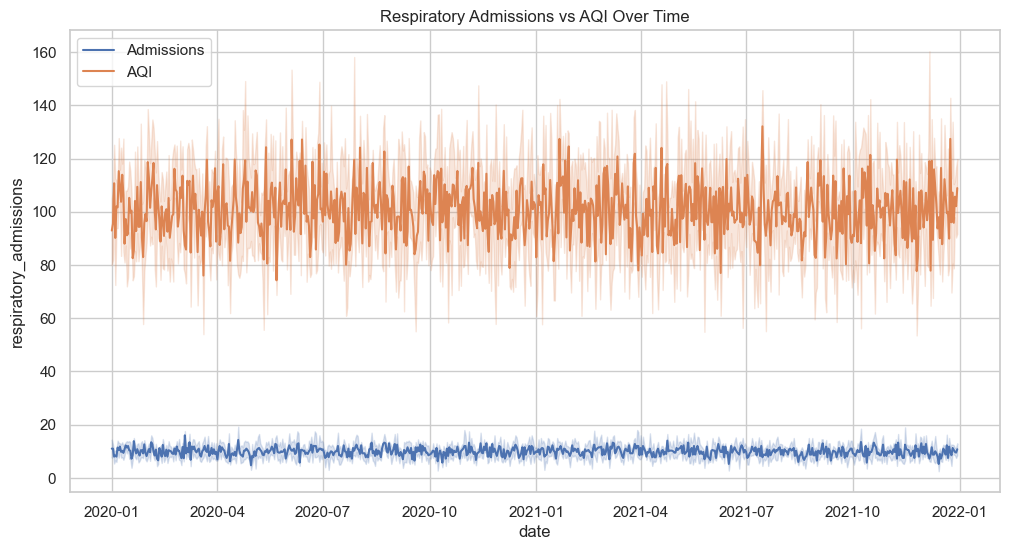

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='respiratory_admissions', label='Admissions')
sns.lineplot(data=df, x='date', y='AQI', label='AQI')
plt.title("Respiratory Admissions vs AQI Over Time")
plt.legend()
plt.show()

### Temporal Analysis
We compare AQI and hospital respiratory admissions over time.

C:\Users\HP\AppData\Local\Temp\ipykernel_21252\1861528939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='weekday', y='AQI', palette='Set2')


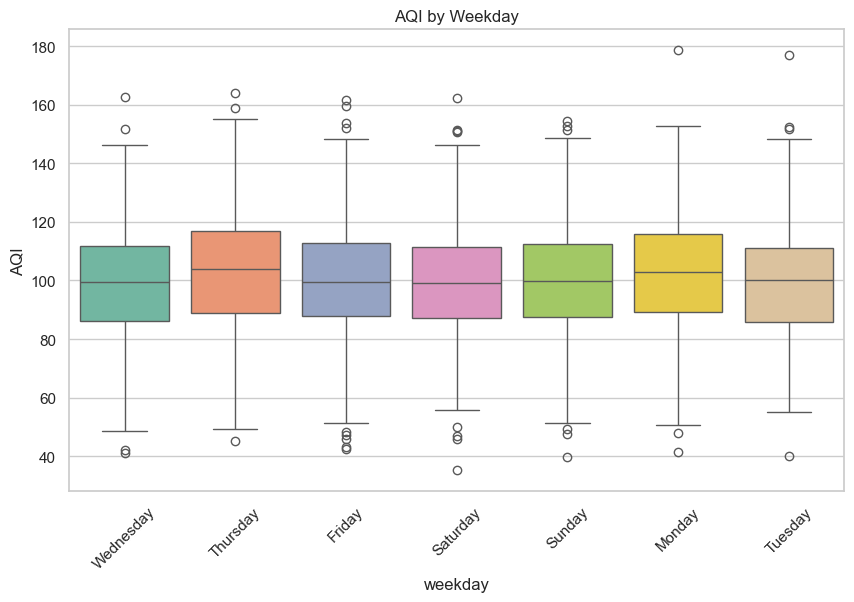

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='weekday', y='AQI', palette='Set2')
plt.title("AQI by Weekday")
plt.xticks(rotation=45)
plt.show()

###  AQI Across Weekdays
Certain weekdays might show patterns in pollution levels.

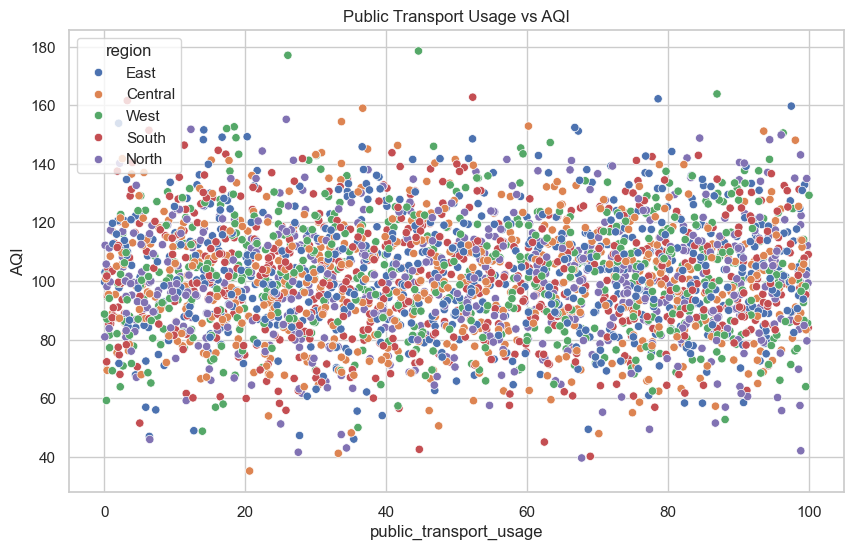

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='public_transport_usage', y='AQI', hue='region')
plt.title("Public Transport Usage vs AQI")
plt.show()

### AQI and Public Transport
We check if heavy transport usage impacts air quality.